In [2]:
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy
import pandas
import torch
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

In [13]:

def arrowed_spines(fig, ax, remove_ticks=False):
    """
    좌표축 화살표를 그리기 위한 함수
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 2. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='r', ec='r', lw = lw, 
             head_width=hw, head_length=hl, #overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='r', ec='r', lw = lw, 
             head_width=yhw, head_length=yhl, #overhang = ohg, 
             length_includes_head= True, clip_on = False)

In [34]:
def log(x, base=np.e):
    return np.log(x) / np.log(base)

<ipython-input-34-26a8a7ab8bfa>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x) / np.log(base)
<ipython-input-34-26a8a7ab8bfa>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x) / np.log(base)


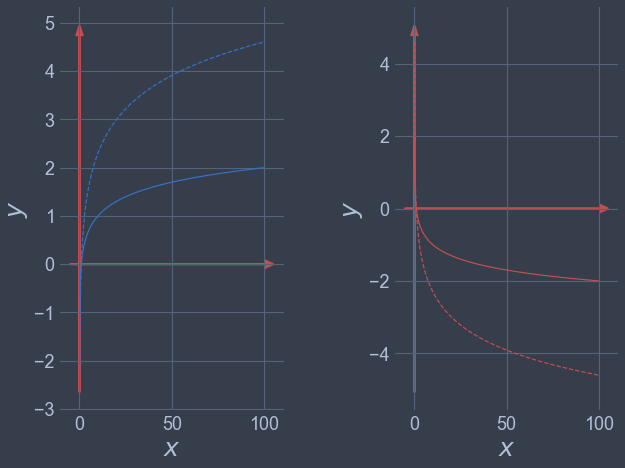

In [40]:
fig = plt.figure(figsize=(10,7))

# a>0 
ax1 = fig.add_subplot(1,2,1)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)

plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)

x = np.linspace(0,100,1000)
log_y, ln_y = log(x,base=10), log(x)

ax1.plot(x,log_y,color='b', label=r"$log x$")
ax1.plot(x,ln_y, '--', color='b', label=r"$ln x$")

# a<0
ax2 = fig.add_subplot(1,2,2)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)

x = np.linspace(0,100,10000)
log_y, ln_y = log(x,base=1/10), log(x, base=1/np.e)

ax2.plot(x,log_y,color='r', label=r"$log_1/10 x$")
ax2.plot(x,ln_y, '--',color='r', label=r"$log_1/e x$")

arrowed_spines(fig,ax1)
arrowed_spines(fig,ax2)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.show()

In [23]:
x = np.linspace(-2,2,10)
y = []
for idx in range(3):
    y.append(x**(1/(idx+2)))
print(y)
    

[array([       nan,        nan,        nan,        nan,        nan,
       0.47140452, 0.81649658, 1.05409255, 1.24721913, 1.41421356]), array([       nan,        nan,        nan,        nan,        nan,
       0.60570686, 0.87358046, 1.03574417, 1.15867555, 1.25992105]), array([       nan,        nan,        nan,        nan,        nan,
       0.68658905, 0.903602  , 1.0266901 , 1.11678965, 1.18920712])]


<ipython-input-23-74afe4612b3b>:4: RuntimeWarning: invalid value encountered in sqrt
  y.append(x**(1/(idx+2)))
<ipython-input-23-74afe4612b3b>:4: RuntimeWarning: invalid value encountered in power
  y.append(x**(1/(idx+2)))


In [41]:
log(4,2)

2.0

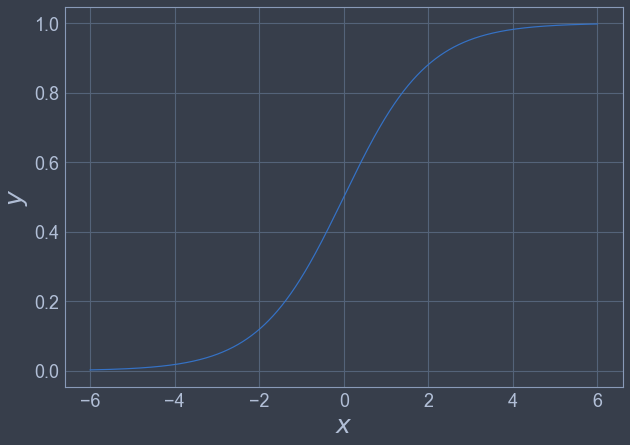

In [43]:
# sigmoid function
# 0 ~ 1 사이의 함수 값을 가짐
# 이전 함수가 어떤 값을 출력해도 최종 출력을 0과 1사이로 변환함
# 이를 '밀어넣다'라는 의미의 squash function이라 함.

fig = plt.figure(figsize=(10,7))

# a>0 
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)

x = np.linspace(-6,6,1000)
y = 1.0/(1+np.e**(-x))

ax.plot(x,y,color='b', label=r"$signa(z) x$")
